## KNN
- 数据集
$$X=[x_1,x_2,...,x_N]^T \in \mathbb{R}^{N*d},Y=[y_1,y_2,...,y_N]^T \in \mathbb{R}^{N*1}$$
- L2距离
$$L_2(x_i,x_j)=(\sum\limits_{l=1}^d \left|x_i^{(l)}-x_j^{(l)}\right|)^\frac{1}{2}$$
- 输出
$$y=\mathop{\arg\min}_{c_j} \sum\limits_{x_i \in N_k(x)}I(y_i=c_j),j=1,2,...,K$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

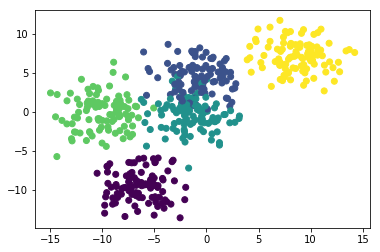

In [2]:
X,Y=make_blobs(n_samples=500,n_features=2,centers=5,cluster_std=2,random_state=11)
plt.scatter(X[:,0],X[:,1],c=Y)
Train_x,Val_x,Train_y,Val_y=train_test_split(X,Y,test_size=0.2)

In [3]:
class KNN():
    def __init__(self,K,label):
        self.K=K
        self.label=label
    def predict(self,train_x,train_y,test_x):
        ans=[]
        for x in test_x:
            tmp=(x-train_x)*(x-train_x)
            tmp=tmp.sum(axis=1)
            id=tmp.argsort()
            vis=np.zeros(self.label)
            for i in range(self.K): 
                vis[train_y[id[i]]]+=1
            ans.append(vis.argmax())
        return np.array(ans)

In [4]:
K,label=10,5
clf=KNN(K,label)
Y=clf.predict(Train_x,Train_y,Val_x)

In [5]:
print("Val acc %lf%%"%(sum(Y==Val_y)/len(Val_x)*100))

Val acc 98.000000%
